In [1]:
import os
import numpy as np
import pandas as pd
import bloscpack as bp

import imgaug as ia
import imgaug.augmenters as iaa

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# from torch.utils.data.dataloader import DataLoader

# import fastai
# from fastai.vision import *
# from fastai.callbacks import *

# from optim import Over9000
# from data import Bengaliai_DS

# from callback_utils import SaveModelCallback
# from mixup_fastai_utils import CmCallback, MuCmCallback, MixUpCallback
# from loss import Loss_combine_weighted, Loss_combine_weighted_v2
# from metric import Metric_grapheme, Metric_vowel, Metric_consonant, Metric_tot
# from models_mg import Simple50GeM

import matplotlib.pyplot as plt

---

---
### data

In [2]:
pdf = pd.read_csv('../input/train.csv')

In [3]:
unique_grapheme = pdf['grapheme'].unique()
grapheme_code = dict([(g, c) for g, c in zip(unique_grapheme, np.arange(unique_grapheme.shape[0]))])
pdf['grapheme_code'] = [grapheme_code[g] for g in pdf['grapheme']]

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
for trn_ndx, vld_ndx in skf.split(pdf['grapheme_code'], pdf['grapheme_code']):
    break
    
trn_pdf = pdf.iloc[trn_ndx, :]
trn_pdf.reset_index(inplace=True, drop=True)
imgs = bp.unpack_ndarray_from_file('../features/train_images_raw_128220.bloscpack')
lbls = pd.read_csv('../input/train.csv').iloc[:, 1:4].values

# trn_imgs = imgs[trn_ndx]
# trn_lbls = lbls[trn_ndx]
# vld_imgs = imgs[vld_ndx]
# vld_lbls = lbls[vld_ndx]

In [4]:
imgs.shape

(200840, 128, 220)

In [58]:
imgs_filter = imgs[(lbls[:, 1] == 0) & (lbls[:, 2] == 0)]

In [5]:
imgs = imgs / 255.

In [6]:
np.mean(imgs)

0.10095022765352311

In [ ]:
np.std(imgs)

In [64]:
# imgs_stat = imgs_filter.std(0)
imgs_stat = np.var(imgs_filter, 0)

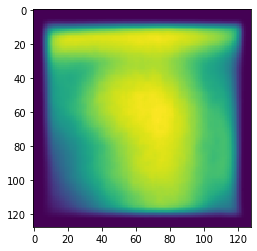

In [65]:
plt.imshow(imgs_stat)

In [4]:
class_map_df = pd.read_csv(os.path.join('../input', 'class_map.csv'))

In [5]:
cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root'), 'component'].values
cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic'), 'component'].values  
cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic'), 'component'].values   

print(f"grapheme root:\n{15*'-'}\n{cm_gr}\n\n vowel discritic:\n{18*'-'}\n{cm_vd}\n\n consonant diacritic:\n{20*'-'}\n {cm_cd}")

grapheme root:
---------------
['ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'ক্ক' 'ক্ট' 'ক্ত'
 'ক্ল' 'ক্ষ' 'ক্ষ্ণ' 'ক্ষ্ম' 'ক্স' 'খ' 'গ' 'গ্ধ' 'গ্ন' 'গ্ব' 'গ্ম' 'গ্ল'
 'ঘ' 'ঘ্ন' 'ঙ' 'ঙ্ক' 'ঙ্ক্ত' 'ঙ্ক্ষ' 'ঙ্খ' 'ঙ্গ' 'ঙ্ঘ' 'চ' 'চ্চ' 'চ্ছ'
 'চ্ছ্ব' 'ছ' 'জ' 'জ্জ' 'জ্জ্ব' 'জ্ঞ' 'জ্ব' 'ঝ' 'ঞ' 'ঞ্চ' 'ঞ্ছ' 'ঞ্জ' 'ট'
 'ট্ট' 'ঠ' 'ড' 'ড্ড' 'ঢ' 'ণ' 'ণ্ট' 'ণ্ঠ' 'ণ্ড' 'ণ্ণ' 'ত' 'ত্ত' 'ত্ত্ব'
 'ত্থ' 'ত্ন' 'ত্ব' 'ত্ম' 'থ' 'দ' 'দ্ঘ' 'দ্দ' 'দ্ধ' 'দ্ব' 'দ্ভ' 'দ্ম' 'ধ'
 'ধ্ব' 'ন' 'ন্জ' 'ন্ট' 'ন্ঠ' 'ন্ড' 'ন্ত' 'ন্ত্ব' 'ন্থ' 'ন্দ' 'ন্দ্ব' 'ন্ধ'
 'ন্ন' 'ন্ব' 'ন্ম' 'ন্স' 'প' 'প্ট' 'প্ত' 'প্ন' 'প্প' 'প্ল' 'প্স' 'ফ' 'ফ্ট'
 'ফ্ফ' 'ফ্ল' 'ব' 'ব্জ' 'ব্দ' 'ব্ধ' 'ব্ব' 'ব্ল' 'ভ' 'ভ্ল' 'ম' 'ম্ন' 'ম্প'
 'ম্ব' 'ম্ভ' 'ম্ম' 'ম্ল' 'য' 'র' 'ল' 'ল্ক' 'ল্গ' 'ল্ট' 'ল্ড' 'ল্প' 'ল্ব'
 'ল্ম' 'ল্ল' 'শ' 'শ্চ' 'শ্ন' 'শ্ব' 'শ্ম' 'শ্ল' 'ষ' 'ষ্ক' 'ষ্ট' 'ষ্ঠ' 'ষ্ণ'
 'ষ্প' 'ষ্ফ' 'ষ্ম' 'স' 'স্ক' 'স্ট' 'স্ত' 'স্থ' 'স্ন' 'স্প' 'স্ফ' 'স্ব'
 'স্ম' 'স্ল' 'স্স' 'হ' 'হ্ন' 'হ্ব' 'হ্ম' 'হ্ল' 'ৎ' 'ড়' 'ঢ়' 'য়']

 vowel discritic:
--------

In [6]:
print(cm_gr[33], cm_gr[34], cm_gr[45])

ঙ্ক্ত ঙ্ক্ষ জ্জ্ব


In [10]:
def plot(selected_images):
    n_rows = np.ceil(len(selected_images)/4).astype(int)
    _, ax = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))
    ndx = 0
    for i in range(n_rows):
        for j in range(4):
            if ndx <= len(selected_images)-1:
                ax[i, j].imshow(selected_images[ndx])
                ndx += 1
            else:
                break
    plt.show()

### root 0

In [7]:
np.all(lbls[lbls[:, 0] == 0] == 0)

True

In [8]:
imgs_root0 = imgs[lbls[:, 0] == 0]

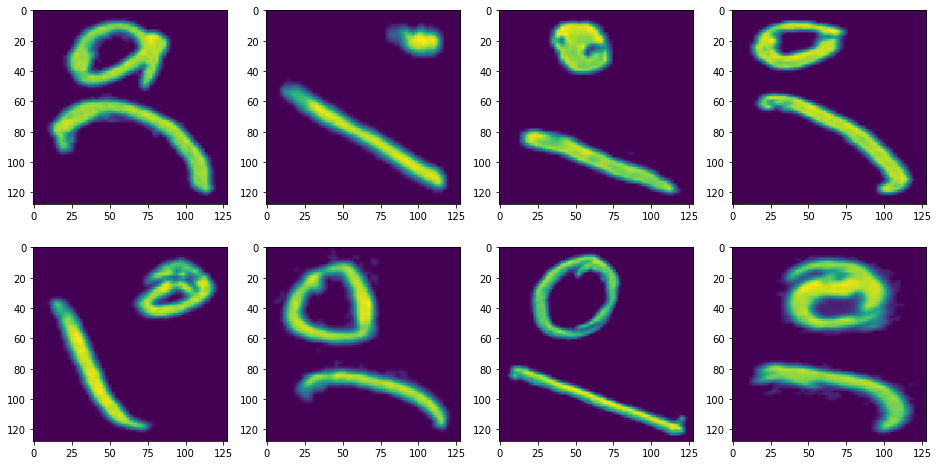

In [11]:
plot_selection = np.random.choice(lbls[lbls[:, 0] == 0].shape[0], 8, replace=False)
plot(imgs_root0[plot_selection])

### root 1

In [11]:
imgs_root1 = imgs[lbls[:, 0] == 1]

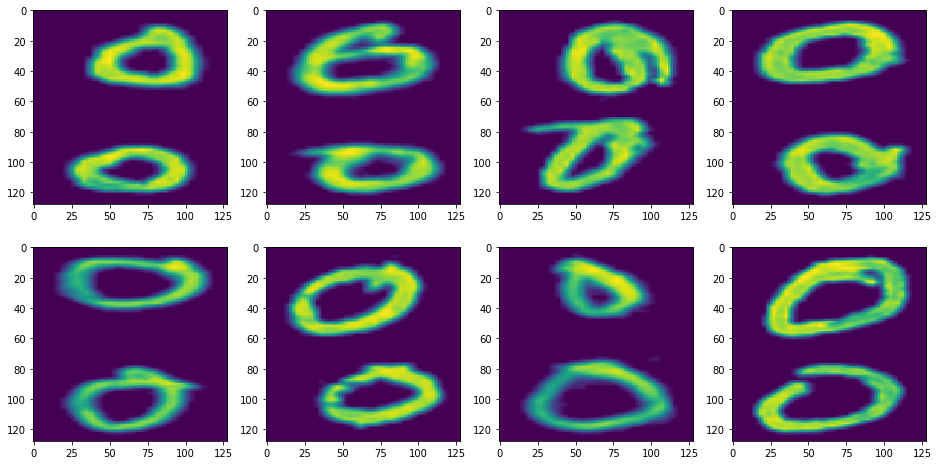

In [12]:
plot_selection = np.random.choice(lbls[lbls[:, 0] == 1].shape[0], 8, replace=False)
plot(imgs_root1[plot_selection])

### root 19

In [12]:
root_value = 19
print(lbls[lbls[:, 0] == root_value].shape)
print(np.unique(lbls[lbls[:, 0] == root_value, 1]))
print(np.unique(lbls[lbls[:, 0] == root_value, 2]))

(278, 3)
[ 0 10]
[0]


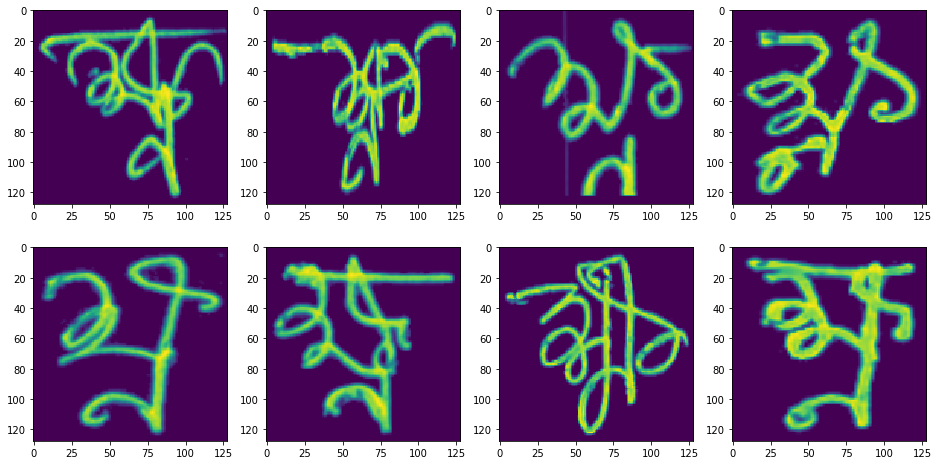

In [13]:
imgs_root19_0_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == 0)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == 0)].shape[0], 8, replace=False)
plot(imgs_root19_0_0[plot_selection])

In [15]:
print(cm_vd)
print(cm_cd)

['0' 'া' 'ি' 'ী' 'ু' 'ূ' 'ৃ' 'ে' 'ৈ' 'ো' 'ৌ']
['0' 'ঁ' 'র্' 'র্য' '্য' '্র' '্র্য']


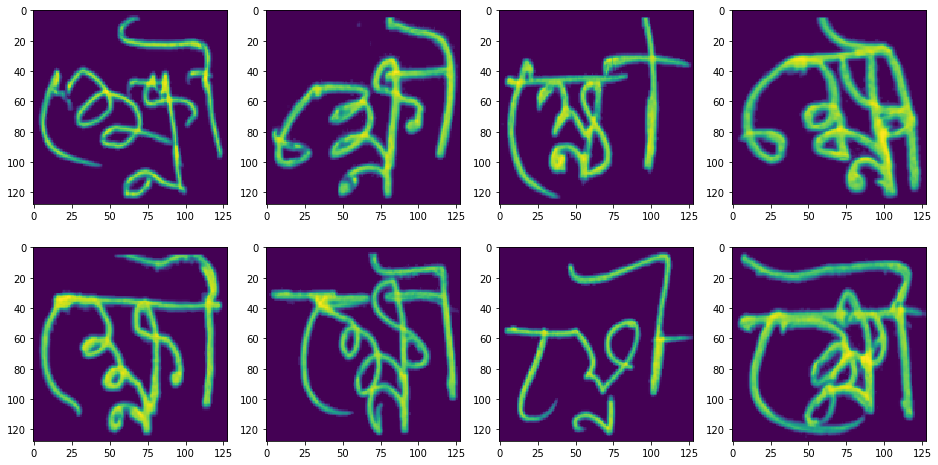

In [14]:
v_value = 10
c_value = 0
imgs_root19_10_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_root19_10_0[plot_selection])

### root 20

In [73]:
root_value = 20
print(lbls[lbls[:, 0] == root_value].shape)
print(np.unique(lbls[lbls[:, 0] == root_value, 1]))
print(np.unique(lbls[lbls[:, 0] == root_value, 2]))

(336, 3)
[0 3]
[0]


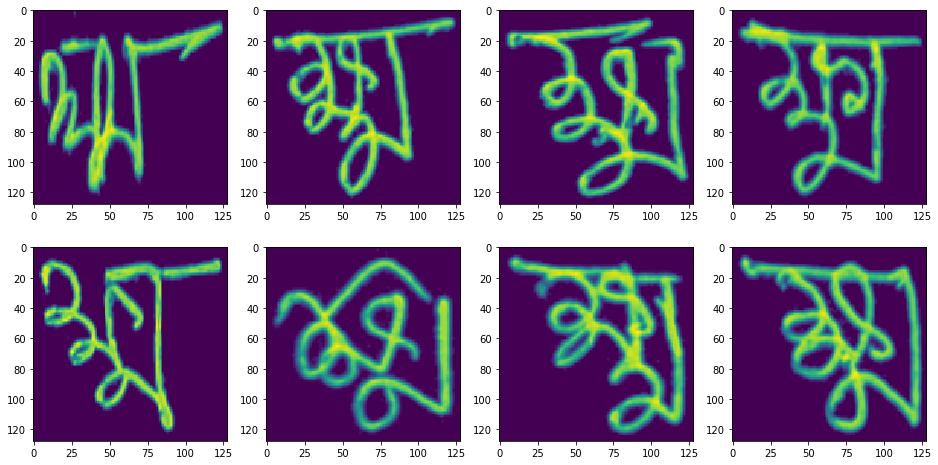

In [74]:
v_value = 0
c_value = 0
imgs_root20_0_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_root20_0_0[plot_selection])

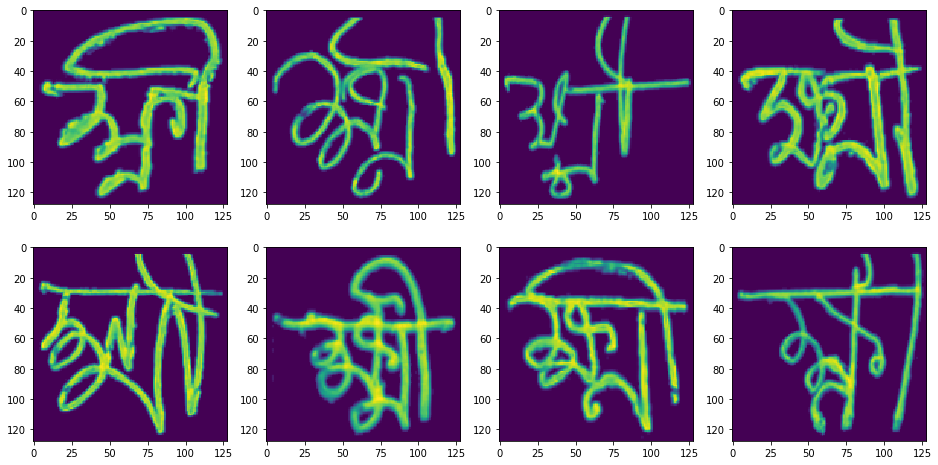

In [75]:
v_value = 3
c_value = 0
imgs_root20_3_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_root20_3_0[plot_selection])

### root 120

In [76]:
root_value = 120
print(lbls[lbls[:, 0] == root_value].shape)
print(np.unique(lbls[lbls[:, 0] == root_value, 1]))
print(np.unique(lbls[lbls[:, 0] == root_value, 2]))

(1207, 3)
[0 1 2 3 4 7 9]
[0 2]


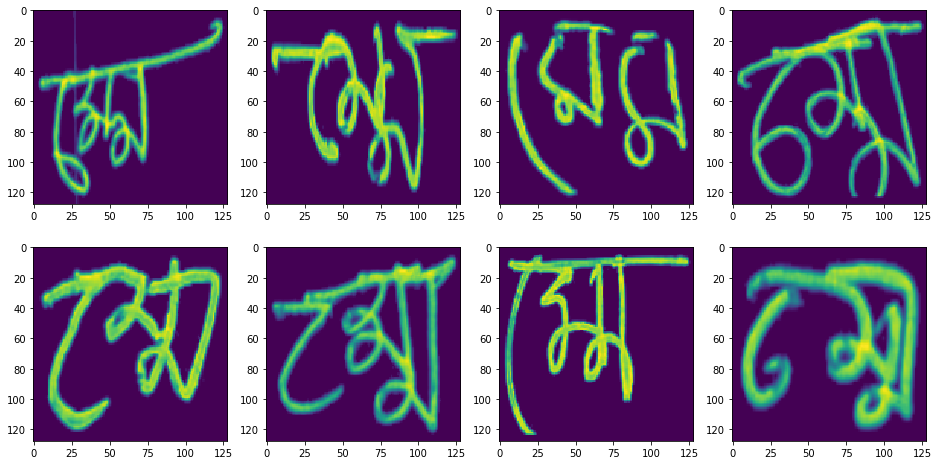

In [82]:
v_value = 7
c_value = 0
imgs_root120_1_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_root120_1_0[plot_selection])

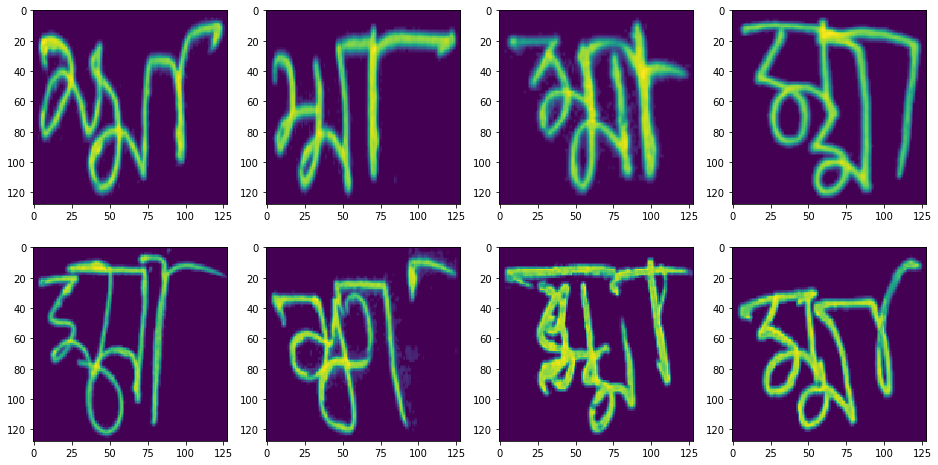

In [23]:
v_value = 1
c_value = 0
imgs_root120_1_0 = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_root120_1_0[plot_selection])

### error analysis

In [27]:
root_value = 45
print(lbls[lbls[:, 0] == root_value].shape)
print(np.unique(lbls[lbls[:, 0] == root_value, 1]))
print(np.unique(lbls[lbls[:, 0] == root_value, 2]))

(144, 3)
[0]
[0]


In [25]:
print(cm_vd)
print(cm_cd)

['0' 'া' 'ি' 'ী' 'ু' 'ূ' 'ৃ' 'ে' 'ৈ' 'ো' 'ৌ']
['0' 'ঁ' 'র্' 'র্য' '্য' '্র' '্র্য']


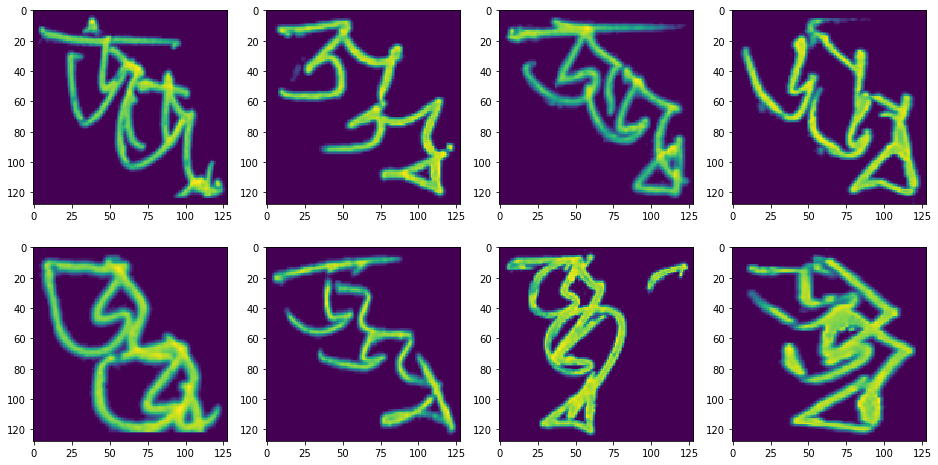

In [28]:
v_value = 0
c_value = 0
imgs_tobeana = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_tobeana[plot_selection])

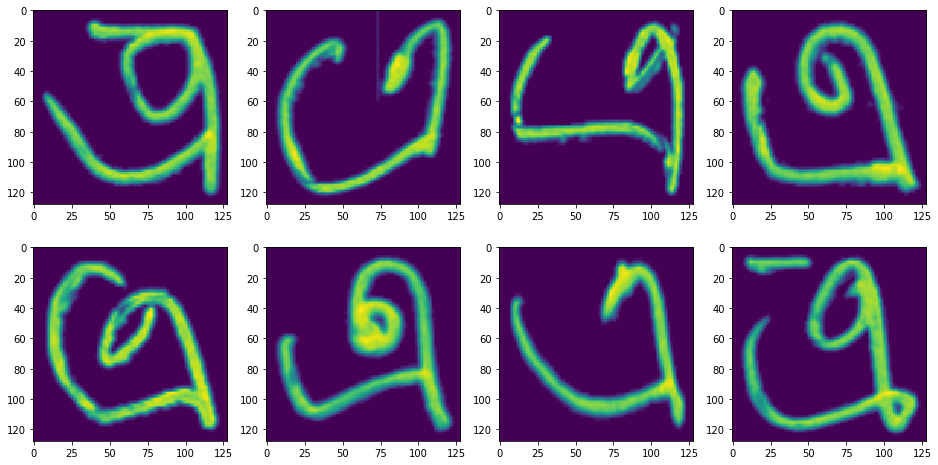

In [27]:
v_value = 0
c_value = 0
imgs_tobeana = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_tobeana[plot_selection])

In [216]:
root_value = 64
print(lbls[lbls[:, 0] == root_value].shape)
print(np.unique(lbls[lbls[:, 0] == root_value, 1]))
print(np.unique(lbls[lbls[:, 0] == root_value, 2]))

(5596, 3)
[ 0  1  2  3  4  5  6  7  8  9 10]
[0 1 2 4 5 6]


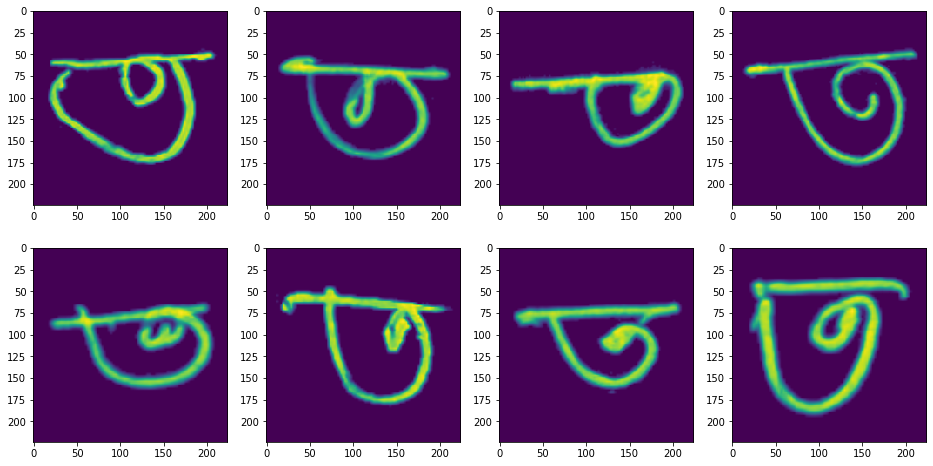

In [217]:
v_value = 0
c_value = 0
imgs_tobeana = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_tobeana[plot_selection])

In [218]:
print(cm_vd)
print(cm_cd)

['0' 'া' 'ি' 'ী' 'ু' 'ূ' 'ৃ' 'ে' 'ৈ' 'ো' 'ৌ']
['0' 'ঁ' 'র্' 'র্য' '্য' '্র' '্র্য']


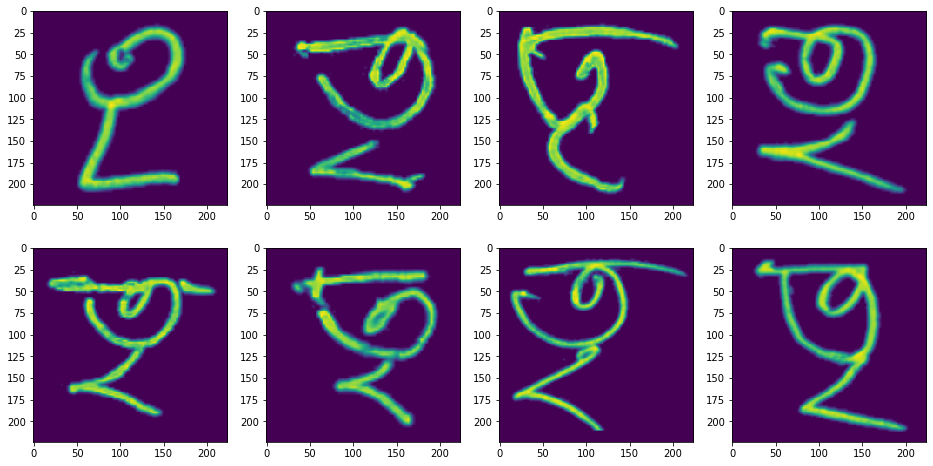

In [229]:
v_value = 6
c_value = 0
imgs_tobeana = imgs[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)]
plot_selection = np.random.choice(lbls[(lbls[:, 0] == root_value) & (lbls[:, 1] == v_value) & (lbls[:, 2] == c_value)].shape[0], 8, replace=False)
plot(imgs_tobeana[plot_selection])